In [37]:
#Import libraries
import numpy as np                                          # linear algebra
import pandas as pd                                         # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
import plotly.express as px                                 #for visualization
import plotly.io as pio
pio.renderers.default = "notebook"

import matplotlib.pyplot as plt                             #for visualization
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import confusion_matrix

In [2]:
#Read the dataset
filepath = r"..\Data\BankChurners.csv"
data = pd.read_csv(filepath)
#data_df

In [3]:
#Deleting the last two columns as dataset owner suggested.

data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


In [4]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000



### Dataset we can find three main classes of features. 

Anagraphical features: Customer_Age, Gender, Education_Level, Marital_Status, Income_Category.

Customer-bank relationship features:

 - Dependent_count: number of people uses that specific account

 - Card_Category: is this a Premium or a Basic account

 - Months_on_book: the duration of the relationship as of now

 - Total_Relationship_Count: Total number of products held by the customer. In other words, client could have other products like debit card, loans, and so on;

 - Contacts_Count_12_mon: the number of contacts between the customer and the bank in the last 12 months. It could be a key indicator of the satisfaction level of the client: the more contacts, the higher the probability that there is something that causes attrition

Credit Card utilization features:

 - Months_Inactive: it determines how many months the client has been inactive. 

 - Credit_Limit: this is the maximum amount the client is allowed to use;

 - Total_Revolving_Bal: the debt amount.

 - Avg_Open_To_Buy: suppose a client has used 500£, and its credit limit is 2500£. The custormer is thus open to buy 2500-500=2000£. Avg_Open_To_Buy is the average over the last 12 months of the Open To Buy value

 - Total_Trans_Amt: total transactional amount in the last 12 months

 - Total_Amt_Chng_Q4_Q1: the ratio between transactional amount of first quarter and the same amount for fourth quarter. 

 - Total_Trans_Ct, Total_Ct_Chng_Q4_Q1: their meaning is analogous to the last two variables. Of course, thee differ on the underlying reference variable, since in this case it is the number of transactions instead of the amount;
 
 - Avg_Utilization_Ratio: Avg_Utilization_Ratio is the average proportion of the credit used with respect to the credit liit in the last 12 months.


### Encoding Categorical data to Numeric data

In [5]:
# The customerID column isnt useful as the feature is used for identification of customers. 
data.drop(['CLIENTNUM'],axis=1,inplace = True)
# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Existing Customer':1, 'Attrited Customer':0})

## Encoding target feature
data['Attrition_Flag'] = data[['Attrition_Flag']].apply(binary_map)

# Encoding gender category
data['gender'] = data['Gender'].map({'M':1, 'F': 0})

#Encoding the other categoric features with more than two categories
data = pd.get_dummies(data, drop_first=True)

### Explore Correlation betweem values 

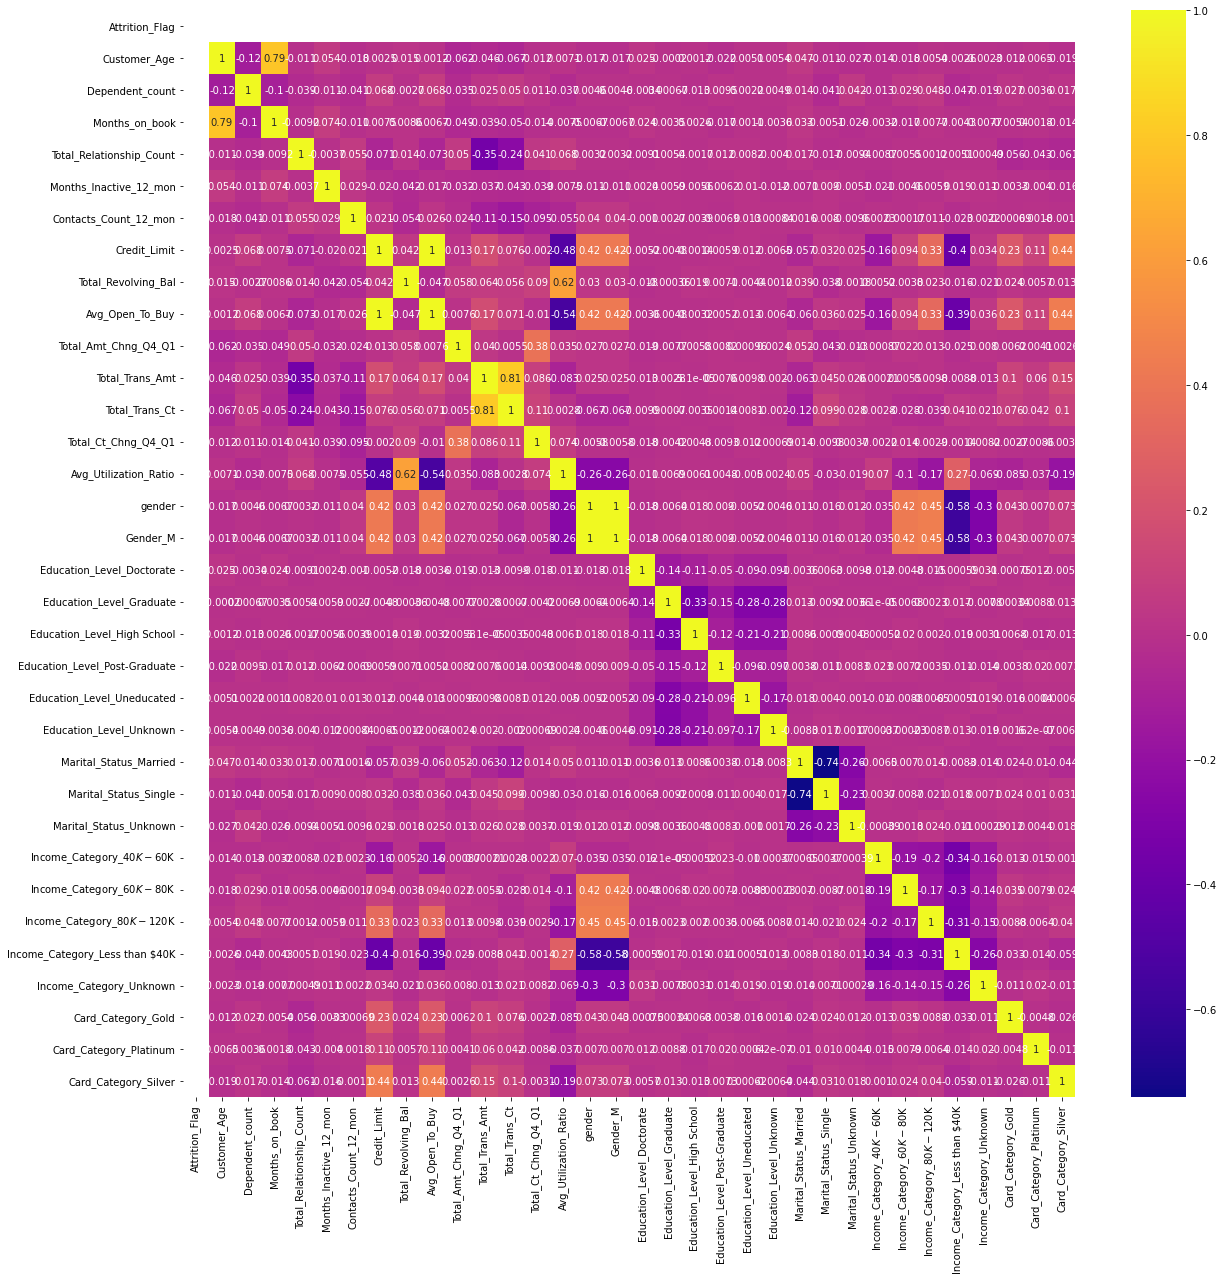

In [6]:
df_corr = data.copy()
df_corr['Attrition_Flag'] = df_corr['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(),annot=True,cmap='plasma')
plt.show()

Correlation measures the linear relationship between two variables. High correlation between two variable, implies have same effect on the dependent variable. 

Therefore, two features having a high correlation, we drop one of the features. For the cases:

- Customer_Age and Months_of_Book have high correlations (0.79); dropping "Months 0f Book"

- Average_Open_to_buy and credit_Limit have high correleations (0.99); dropping "Average_Open_to_buy"

-Avarage utilization and Total Revolving balance

#### Statistical Exploration of Features that makes customers churn or retain

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_").replace("$", "dollar") for column in data.columns]

#Effect the change to the dataframe column names
data.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['CLIENTNUM', 'Attrition_Flag']]
glm_columns = ' + '.join(map(str, glm_columns))
#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Attrition_Flag ~ {glm_columns}', data=data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10095
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2355.3
Date:                Thu, 30 Jun 2022   Deviance:                       4710.6
Time:                        15:38:01   Pearson chi2:                 1.00e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3406
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

    =====================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
    -----------------------------------------------------------------------------------------------------
    Gender[T.M]                          -0.8938      0.146     -6.136      0.000      -1.179      -0.608
    Marital_Status[T.Married]            -0.4994      0.154     -3.237      0.001      -0.802      -0.197
    Income_Category[T.$40K - $60K]       -0.9083      0.203     -4.481      0.000      -1.306      -0.511
    Income_Category[T.$60K - $80K]       -0.6405      0.179     -3.577      0.000      -0.991      -0.290
    Income_Category[T.Less than $40K]    -0.7702      0.219     -3.516      0.000      -1.199      -0.341
    Income_Category[T.Unknown]           -0.8321      0.232     -3.585      0.000      -1.287      -0.377
    Card_Category[T.Gold]                 1.0655      0.352      3.025      0.002       0.375       1.756
    Card_Category[T.Silver]               0.4502      0.196      2.299      0.021       0.066       0.834
    Dependent_count                       0.1358      0.030      4.531      0.000       0.077       0.195
    Total_Relationship_Count             -0.4493      0.028    -16.337      0.000      -0.503      -0.395
    Months_Inactive_12_mon                0.5077      0.038     13.387      0.000       0.433       0.582
    Contacts_Count_12_mon                 0.5132      0.037     14.042      0.000       0.442       0.585
    Credit_Limit                         -0.0003    2.3e-05    -14.082      0.000      -0.000      -0.000
    Total_Revolving_Bal                  -0.0006   4.74e-05    -13.258      0.000      -0.001      -0.001
    Avg_Open_To_Buy                       0.0003   2.48e-05     12.250      0.000       0.000       0.000
    Total_Amt_Chng_Q4_Q1                 -0.4262      0.188     -2.272      0.023      -0.794      -0.058
    Total_Trans_Amt                       0.0005   2.29e-05     21.156      0.000       0.000       0.001
    Total_Trans_Ct                       -0.1192      0.004    -31.940      0.000      -0.126      -0.112
    Total_Ct_Chng_Q4_Q1                  -2.7982      0.189    -14.820      0.000      -3.168      -2.428
    ======================================================================================================

Question 1: Which features make customers churn or retain?

Hypothesis:If the absolute p-value (P>|z|) column) is smaller than 0.05, it means that the feature affects Churn in a statistically significant way. 

- Dependent count
- Total_Relationship_Count 
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit 
- Total_Revolving_Bal 
- Avg_Open_To_Buy 
- Card_Category
- Income_Category_Less_than_dollar40K  
- Income_Category_dollar40K___dollar60K 
- Income_Category_dollar60K___dollar80K 
- Marital_Status_Married 
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt 
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1 


Question2: What are the most important features to train a model with high performance?

- Exponential coefficient values: This coefficient estimates the expected change in churn through a given feature by a change of one unit.

In [9]:
np.exp(res.params)

Intercept                                  0.001202
Customer_Age                               1.006150
Dependent_count                            0.873018
Months_on_book                             1.004696
Total_Relationship_Count                   1.567236
Months_Inactive_12_mon                     0.601842
Contacts_Count_12_mon                      0.598547
Credit_Limit                               1.000324
Total_Revolving_Bal                        1.000628
Avg_Open_To_Buy                            0.999696
Total_Amt_Chng_Q4_Q1                       1.531489
Total_Trans_Amt                            0.999515
Total_Trans_Ct                             1.126563
Total_Ct_Chng_Q4_Q1                       16.415443
Avg_Utilization_Ratio                      1.133486
gender                                     1.563447
Gender_M                                   1.563447
Education_Level_Doctorate                  0.691478
Education_Level_Graduate                   1.005815
Education_Le

RemarK:

Values more than 1 indicate increased churn. Values less than 1 indicate that churn is happening less.

Intercept                                  0.001202
- Customer_Age                               1.006150
- Months_on_book                             1.004696
- Total_Relationship_Count                   1.567236
- Credit_Limit                               1.000324
- Total_Revolving_Bal                        1.000628
- Total_Amt_Chng_Q4_Q1                       1.531489
- Total_Trans_Ct                             1.126563
- Total_Ct_Chng_Q4_Q1                       16.415443
- Avg_Utilization_Ratio                      1.133486
- gender                                     1.563447
- Gender_M                                   1.563447
- Education_Level_Graduate                   1.005815
- Marital_Status_Married                     1.647764
- Income_Category_dollar40K___dollar60K      2.480112
- Income_Category_dollar60K___dollar80K      1.897387
- Income_Category_dollar80K___dollar120K     1.347592
- Income_Category_Less_than_dollar40K        2.160249
- Income_Category_Unknown                    2.298240

### Model Selection 

In [10]:
# Select numerical variables
numeric = data.select_dtypes(exclude=object).columns


# Select categorical variables
categ = data.select_dtypes(include=object).columns

#### Scaling features

In [11]:
skew_limit = 0.5
skew_vals = data[numeric].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
Card_Category_Platinum,22.438831
Card_Category_Gold,9.183588
Education_Level_Doctorate,4.416665
Education_Level_Post_Graduate,4.084679
Card_Category_Silver,3.912718
Marital_Status_Unknown,3.256333
Income_Category_Unknown,2.496440
Income_Category_dollar60K___dollar80K,2.094096
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003


In [12]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    data[col] = boxcox1p(data[col], boxcox_normmax(data[col] + 1))

c:\Users\masud\Documents\Customer-Churn-Prediction\venv\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [13]:
#Scaling features
from sklearn.preprocessing import MinMaxScaler

for col in data[numeric]:
    data[col] = MinMaxScaler().fit_transform(data[[col]])

#### Models

In [14]:

# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

#### DAtA Upsampling with SMOTE

In [16]:
# Dealing with imbalanced dataset (only for tge trained data)
from imblearn.over_sampling import SMOTE

def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE."""
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [17]:
X_train_sm, y_train_sm = upsample_SMOTE(X_train, y_train)

11966 11966


In [18]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model


#### Logistic Regression

In [19]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression', {'solver' : 'lbfgs', 'max_iter' : 1000})

Logistic Regression
accuracy:  0.861796643632774
precision:  0.9584608657630083
recall:  0.8708780294000794
f1_score:  0.8709634637534471


### Compared Other machine learning model 


#### SVC_model

In [20]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.8821980914774596
precision:  0.9530004196391104
recall:  0.902264600715137
f1_score:  0.8872874392367024


#### Random forest

In [21]:
#Random forest
rf_model_ori = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.9506416584402764
precision:  0.9694565648552161
recall:  0.9709972189114024
f1_score:  0.9505663329717007


#### Decision Tree


In [22]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.9160908193484699
precision:  0.9658154859967051
recall:  0.9316646801748113
f1_score:  0.9186313601696372


#### Naive bayes 

In [23]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.8288910825929582
precision:  0.9400617011899515
recall:  0.8474374255065554
f1_score:  0.8408800566776055


## Improve best model by hyperparameter tuning

In [24]:
# define model
model = RandomForestClassifier()

params = ({"random_state" : 1,
         "n_estimators" : 750,
         "max_depth" : 15, 
         "min_samples_split" : 5,  
         "min_samples_leaf" : 1})

In [25]:
#Improving the Random Forest Classifier model
rf_model = modeling(RandomForestClassifier, "Random Forest Classification", params=params)

Random Forest Classification
accuracy:  0.9480092135570911
precision:  0.9671287128712871
recall:  0.9702026221692491
f1_score:  0.947849723091297


#### Remark

The model doesnt improved. Let’s save the first model

In [26]:
#Saving best model 

import joblib
#Sava the model to disk
filename = 'model2.sav'
joblib.dump(rf_model_ori, filename)

['model2.sav']

### Feature Selection for the Model 

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train_sm, y_train_sm) 
predictions = classifier.predict(X_test)


<AxesSubplot:>

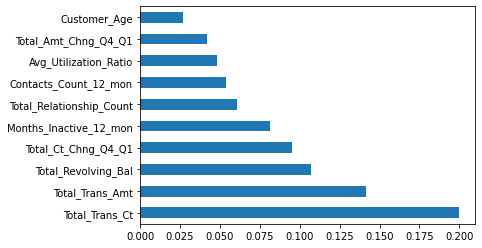

In [28]:
feat_importances = pd.Series(classifier.feature_importances_, index=X_train_sm.columns)
feat_importances.nlargest(10).plot(kind='barh')  

<AxesSubplot:>

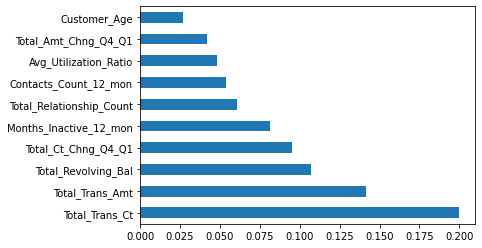

In [29]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')  

Customer churn prediction is crucial to the long-term financial stability of a company.

Based on this data, we can see that 

<AxesSubplot:>

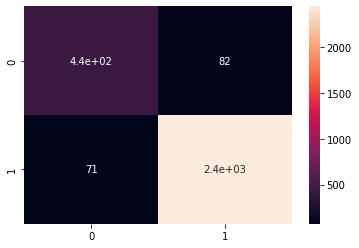

In [38]:
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

- True Positive (TP) is the number of correct predictions that an example is positive which means positive class correctly identified as positive. Example: Given class is churned and the classifier has been correctly predicted it as churned.

- False Negative (FN) is the number of incorrect predictions that an example is negative which means positive class incorrectly identified as negative. Example: Given class is churned however, the classifier has been incorrectly predicted it as non-churned.

- False positive (FP) is the number of incorrect predictions that an example is positive which means negative class incorrectly identified as positive. Example: Given class is non-churned however, the classifier has been incorrectly predicted it as churned.

- True Negative (TN) is the number of correct predictions that an example is negative which means negative class correctly identified as negative. Example: Given class is not churned and the classifier has been correctly predicted it as not negative.